In [12]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

In [33]:
df_performance = pd.read_csv('data/sedal_ad_performance.csv')

df_ads = pd.read_csv('data/sedal_ads.csv')

df_branding = pd.read_csv('data/sedal_branding_metrics.csv')

df_tags = pd.read_csv('data/sedal_tags.csv')

In [14]:
print(f'ad_id in ad_performance: {df_performance.ad_id.nunique()}')

print(f'ad_id in ads: {df_ads.ad_id.nunique()}')

print(f'assetId in ads: {df_ads.assetId.nunique()}')

print(f'No ad_id here. assetId in branding_metricss: {df_branding.assetId.nunique()}')

print(f'No ad_id here. assetId in tags: {df_tags.assetId.nunique()}')

ad_id in ad_performance: 552
ad_id in ads: 1021
assetId in ads: 591
No ad_id here. assetId in branding_metricss: 591
No ad_id here. assetId in tags: 591


In [34]:
df_aux = df_ads.groupby('ad_id').assetId.nunique()
df_aux

ad_id
6032124851673    1
6032124854473    1
6032823063273    1
6032823065273    1
6032860330473    1
                ..
6336249713273    4
6336250279073    4
6336251362073    2
6336251747073    2
6336252500273    2
Name: assetId, Length: 1021, dtype: int64

In [35]:
df_aux2 = df_aux.reset_index()

df_ads_no_carr = df_aux2.loc[df_aux2.assetId==1]
df_ads_carr = df_aux2.loc[df_aux2.assetId>1]

df_ads_no_carr.head()

,ad_id,assetId
0,6032124851673,1
1,6032124854473,1
2,6032823063273,1
3,6032823065273,1
4,6032860330473,1


In [36]:
df_ads_without_carr = df_ads.loc[df_ads.ad_id.isin(df_ads_no_carr.ad_id)]

In [38]:
df_ads.ad_id.nunique(), df_ads_without_carr.ad_id.nunique()

(1021, 743)

In [39]:
df_performance_groupby_ad_id = df_performance.groupby('ad_id').sum(numeric_only=True).reset_index()

df_performance_groupby_ad_id.head()

,ad_id,ad_manager_account,campaign_id,ad_group,ad,impressions,spend,comments,reactions,conversion,frequency,reach,clicks,video_views,cpc,cpm,engagement_rate,ctr,vtr,cpcv,cr,cost_per_conversion,reaction_rate,comment_rate,cost_per_engagement
0,6199130066473,5596447667905116,24796506715492,24796514696292,828858729944,2648715,20625.00,0,0,0,4.006904,2643216,889,21133,53.277713,24.427104,0.0,0.001117,0.026891,3.356353,0.0,0.0,0.0,0.000000,0.000
1,6232556954873,33578686007430696,149560494894552,149581363667352,4973152379664,17639902,250000.00,18,0,0,24.106043,17554700,12140,286070,202.407150,339.263109,0.0,0.016404,0.389372,21.000486,0.0,0.0,0.0,0.000024,94908.635
2,6232557343273,33578686007430696,149560494894552,149581376233752,4973152379664,8430036,82330.16,0,0,0,24.586537,8338074,1896,74926,696.525141,219.923587,0.0,0.005539,0.209053,25.041800,0.0,0.0,0.0,0.000000,0.000
3,6234016736673,22385790671620464,99706996596368,99720917489168,3315434919776,4482223,37572.10,0,0,0,16.342177,4389942,1103,44962,369.445298,136.462383,0.0,0.003920,0.158572,13.828508,0.0,0.0,0.0,0.000000,0.000
4,6234017085473,22385790671620464,99706996596368,99720917489168,3315434919776,845387,6566.67,0,0,0,16.289020,830777,230,12718,271.221990,135.886090,0.0,0.004536,0.228824,9.800079,0.0,0.0,0.0,0.000000,0.000


In [42]:
df_performance_ads = pd.merge(df_performance_groupby_ad_id, df_ads_without_carr[['ad_id', 'assetId']], on='ad_id')

df_performance_ads.head()

,ad_id,ad_manager_account,campaign_id,ad_group,ad,impressions,spend,comments,reactions,conversion,frequency,reach,clicks,video_views,cpc,cpm,engagement_rate,ctr,vtr,cpcv,cr,cost_per_conversion,reaction_rate,comment_rate,cost_per_engagement,assetId
0,6199130066473,5596447667905116,24796506715492,24796514696292,828858729944,2648715,20625.00,0,0,0,4.006904,2643216,889,21133,53.277713,24.427104,0.0,0.001117,0.026891,3.356353,0.0,0.0,0.0,0.000000,0.000,01GNWKENHR87JK700X6175JRTP
1,6232556954873,33578686007430696,149560494894552,149581363667352,4973152379664,17639902,250000.00,18,0,0,24.106043,17554700,12140,286070,202.407150,339.263109,0.0,0.016404,0.389372,21.000486,0.0,0.0,0.0,0.000024,94908.635,01GNWKENG6ZSRK6WWQWV0XCVWK
2,6232557343273,33578686007430696,149560494894552,149581376233752,4973152379664,8430036,82330.16,0,0,0,24.586537,8338074,1896,74926,696.525141,219.923587,0.0,0.005539,0.209053,25.041800,0.0,0.0,0.0,0.000000,0.000,01GNWKENJGD8MER2539YBTCQVA
3,6234016736673,22385790671620464,99706996596368,99720917489168,3315434919776,4482223,37572.10,0,0,0,16.342177,4389942,1103,44962,369.445298,136.462383,0.0,0.003920,0.158572,13.828508,0.0,0.0,0.0,0.000000,0.000,01GNWKENGFAS92AY9QA8WMGZ4S
4,6234017085473,22385790671620464,99706996596368,99720917489168,3315434919776,845387,6566.67,0,0,0,16.289020,830777,230,12718,271.221990,135.886090,0.0,0.004536,0.228824,9.800079,0.0,0.0,0.0,0.000000,0.000,01GNWKENJ2KW7MZP8Q5SS2X9B4


In [43]:
df_performance_ads.ad_id.nunique(), df_performance_ads.assetId.nunique()

(398, 99)

In [47]:
df_tags_branding = pd.merge(df_tags, df_branding, how='left', on='assetId')

In [48]:
df_tags_branding_performance_ads = pd.merge(df_tags_branding, df_performance_ads, on='assetId')

In [49]:
df_tags_branding_performance_ads.ad_id.nunique(), df_tags_branding_performance_ads.assetId.nunique()

(398, 99)

In [14]:
df_tags_branding_performance_ads.to_csv('data/sedal_4_tables_merged.csv', index=False)

(0.0, 100000.0)

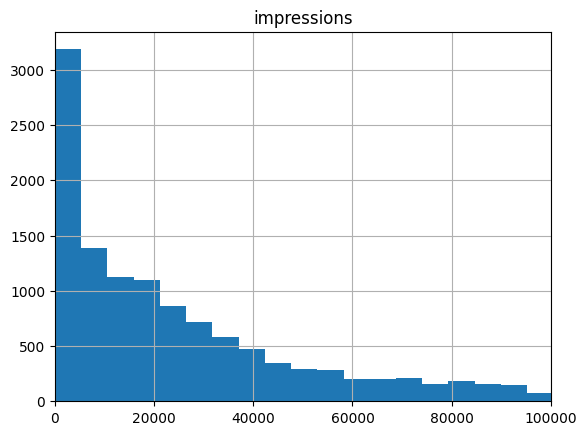

In [23]:
import matplotlib.pyplot as plt
df_performance.hist('impressions', bins=500)
plt.xlim(0,100000)

In [112]:
df_tags.name.unique()

array(['creativity', 'bright', 'graphic design', ..., 'handmade', 'luna',
       'el luna park'], dtype=object)